In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pymatgen.core.structure import Structure

In [61]:
data = pd.read_pickle("/Users/rmgaliullin/ai4material_design/datasets/processed/dichalcogenides_MoS2_all/data.pickle.gz")
BP_targets = pd.read_csv("/Users/rmgaliullin/ai4material_design/datasets/processed/dichalcogenides_MoS2_all/targets.csv.gz", index_col="_id")

In [62]:
data.head(10)

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap
_id,,,,,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,6141cf0efbfd4bd9ab2c2f7c,-1391.340414,-7.284505,-0.199707,-0.6754,0.4698,[[-7.98855051 17.50569919 5.28204642] X0+],2.645686,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,2.645686,1.1452
6141cf0f51c1cbd9654b8870,6141cf0e51c1cbd9654b886e,-1384.552821,-7.287120,-0.220627,-0.6852,0.3991,"[[14.34365939 6.45412142 2.15745558] X0+, [9...",5.306279,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,2.653139,1.0843
6141cf0fe689ecc4c43cdd4b,6141cf0fe689ecc4c43cdd49,-1397.196141,-7.277063,-0.183537,-0.6931,1.1102,[[ 4.78547342 17.49833154 2.15486663] Se],0.278959,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.278959,1.8033
6141cf10b842c2e72e2f2d44,6141cf10b842c2e72e2f2d42,-1396.257593,-7.272175,-0.179802,-0.6916,1.1179,"[[ 9.57094697 20.26122598 2.15486663] Se, [20...",0.579507,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.289753,1.8095
6141cf1051c1cbd9654b8872,6141cf0e51c1cbd9654b886e,-1384.532677,-7.287014,-0.213190,-0.6718,0.4384,"[[ 7.96302799 17.50569919 2.15745558] X0+, [-...",5.326423,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,2.663212,1.1102
6141cf10b842c2e72e2f2d46,6141cf10b842c2e72e2f2d42,-1396.256283,-7.272168,-0.180389,-0.6915,1.1178,"[[-6.38063149 14.73543703 2.15486663] Se, [20...",0.580817,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.290409,1.8093
6141cf11cc0e69a0cf28ab35,6141cf10cc0e69a0cf28ab33,-1390.404410,-7.279604,-0.200633,-0.6706,0.4778,"[[ 3.19031561 14.73543703 2.15486663] Se, [4....",2.943690,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,1.471845,1.1484
6141cf11b842c2e72e2f2d48,6141cf10b842c2e72e2f2d42,-1396.248107,-7.272126,-0.179317,-0.6910,1.1158,"[[14.35642052 0.92096489 5.28463537] Se, [17...",0.588993,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.294496,1.8068
6141cf11ae4fb853db2e3f14,6141cf11ae4fb853db2e3f12,-1380.058423,-7.225437,-0.310205,-0.1302,0.2747,[[12.77402406 12.88613968 3.719751 ] X0+],7.121477,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,7.121477,0.4049


In [63]:
BP_flat = data.combine_first(BP_targets)

In [64]:
# Assuming BP_flat is your DataFrame
filtered_data = data[data['defect_representation'].apply(lambda x: len(x) == 3)]
filtered_data['smth'] = filtered_data['defect_representation'].apply(lambda x: len(x))

# Sort the DataFrame by the 'smth' column in decreasing order
filtered_data = filtered_data.sort_values(by='smth', ascending=False)
row = filtered_data.sample(n=1)
one_pair = Structure.from_sites([row['defect_representation'].iloc[0][0], row['defect_representation'].iloc[0][1]])
one_pair

/var/folders/_7/w61_y6mj5bgdr26d9sk7tmps8zhr5b/T/ipykernel_8264/4236762209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['smth'] = filtered_data['defect_representation'].apply(lambda x: len(x))


Structure Summary
Lattice
    abc : 25.5225256 25.5225256 14.879004
 angles : 90.0 90.0 119.99999999999999
 volume : 8393.668021812642
      A : 25.5225256 0.0 1.5628039641098191e-15
      B : -12.761262799999994 22.10315553833868 1.5628039641098191e-15
      C : 0.0 0.0 14.879004
PeriodicSite: W (7.9758, 4.6048, 3.7198) [0.4167, 0.2083, 0.2500]
PeriodicSite: Se (-3.1903, 20.2612, 2.1549) [0.3333, 0.9167, 0.1448]

In [65]:
lst = row['defect_representation'].iloc[0]
pairs = [(lst[i], lst[j]) for i in range(len(lst)) for j in range(i + 1, len(lst))]
lst

Structure Summary
Lattice
    abc : 25.5225256 25.5225256 14.879004
 angles : 90.0 90.0 119.99999999999999
 volume : 8393.668021812642
      A : 25.5225256 0.0 1.5628039641098191e-15
      B : -12.761262799999994 22.10315553833868 1.5628039641098191e-15
      C : 0.0 0.0 14.879004
PeriodicSite: W (7.9758, 4.6048, 3.7198) [0.4167, 0.2083, 0.2500]
PeriodicSite: Se (-3.1903, 20.2612, 2.1549) [0.3333, 0.9167, 0.1448]
PeriodicSite: X0+ (7.9630, 6.4541, 5.2820) [0.4580, 0.2920, 0.3550]

In [66]:
row

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap,smth
_id,,,,,,,,,,,,
6141f5c54e27a1844a5f0482,6141cf184e27a1844a5efff8,-1392.251675,-7.289276,-0.232209,-0.6899,0.4859,"[[7.97578938 4.604824 3.719751 ] W, [-3.190...",3.173825,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,1.057942,1.1758,3


In [75]:
# Precompute possible pairs outside the loop
defect_pairs = [(i, j) for i in range(2) for j in range(i + 1, 3)]

# Function to find matching pairs
def find_matching_pairs(row):
    pairs = []

    for i, j in defect_pairs:
        one_pair = Structure.from_sites([row['defect_representation'][i], row['defect_representation'][j]])
        
        condition = (
            (data['defect_representation'].apply(lambda x: 
                len(x) == 2 and 
                sorted([site.species for site in x]) == sorted([site.species for site in one_pair]) and
                x[0].distance(x[1]) == one_pair[0].distance(one_pair[1])
            )) & (data.index != row.name)
        )

        matching_pairs = data.loc[condition, 'formation_energy']
        pairs.extend(matching_pairs.tolist())

    return np.mean(pairs) if pairs else np.nan

# Apply the function to each row and store the results in a new column
filtered_data = data[data['defect_representation'].apply(lambda x: len(x) == 3)]
filtered_data.loc[:, 'matching_pairs'] = filtered_data.apply(find_matching_pairs, axis=1)

filtered_data

/var/folders/_7/w61_y6mj5bgdr26d9sk7tmps8zhr5b/T/ipykernel_8264/551400045.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['matching_pairs'] = filtered_data.apply(find_matching_pairs, axis=1)


,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap,matching_pairs
_id,,,,,,,,,,,,
6141cf133ac25c70a5c6c837,6141cf123ac25c70a5c6c835,-1366.498228,-7.230149,-0.372855,-0.1433,0.2172,"[[-1.58239659 21.17482301 3.719751 ] X0+, [ ...",12.427672,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,4.142557,0.3605,5.324782
6141cf143ac25c70a5c6c839,6141cf123ac25c70a5c6c835,-1366.483400,-7.230071,-0.377160,-0.1363,0.2028,"[[ 9.58370836 18.41192856 3.719751 ] X0+, [1...",12.442500,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,4.147500,0.3391,NaN
6141cf14ee0a3fd43fb479d7,6141cf13ee0a3fd43fb479d5,-1378.201138,-7.215713,-0.315632,-0.1031,0.2750,"[[3.20307696 7.36035079 3.719751 ] X0+, [23.9...",7.702762,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,2.567587,0.3781,NaN
6141cf15ee0a3fd43fb479d9,6141cf13ee0a3fd43fb479d5,-1378.200260,-7.215708,-0.314099,-0.0910,0.2573,"[[15.96433976 7.36035079 3.719751 ] X0+, [ ...",7.703640,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,2.567880,0.3483,NaN
6141cf1531cf3ef3d4a9ed3e,6141cf1431cf3ef3d4a9ed3c,-1372.350955,-7.222900,-0.345209,-0.1335,0.2485,"[[-3.17755444 18.41192856 3.719751 ] X0+, [3...",10.063945,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,3.354648,0.3820,5.186197
...,...,...,...,...,...,...,...,...,...,...,...,...
61521f38b44c3cef9d45fba0,6151846bb44c3cef9d45f812,-780.578395,-7.295125,-0.065292,-0.6874,0.4417,"[[ 7.97578922 10.13061294 3.719751 ] W, [7.9...",3.172005,[[9.57094716e-08 1.84192961e+00 3.71975100e+00...,1.057335,1.1291,NaN
6152355ab44c3cef9d45fba2,6151846bb44c3cef9d45f812,-780.573053,-7.295075,-0.062546,-0.6858,0.4420,"[[-6.38063134 12.89350743 3.719751 ] W, [3.1...",3.177347,[[9.57094716e-08 1.84192961e+00 3.71975100e+00...,1.059116,1.1278,NaN
6152369eb44c3cef9d45fba4,6151846bb44c3cef9d45f812,-780.532324,-7.294695,-0.073396,-0.6975,0.4622,"[[ 3.19031576 12.89350743 3.719751 ] W, [ 4....",3.218076,[[9.57094716e-08 1.84192961e+00 3.71975100e+00...,1.072692,1.1597,NaN


In [76]:
filtered_data.loc['6141cf273ac25c70a5c6c849'].defect_representation[1].distance(filtered_data.loc['6141cf273ac25c70a5c6c849'].defect_representation[2])

8.440781945984948

In [77]:
data.loc['6141cf3451c1cbd9654b887e'].defect_representation[0].distance(data.loc['6141cf3451c1cbd9654b887e'].defect_representation[1])

8.440781945984948

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9422 entries, 6141cf0efbfd4bd9ab2c2f7e to 61524ab7b44c3cef9d45fba8
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   descriptor_id              9422 non-null   object 
 1   energy                     9422 non-null   float64
 2   energy_per_atom            9422 non-null   float64
 3   fermi_level                9422 non-null   float64
 4   homo                       9422 non-null   float64
 5   lumo                       9422 non-null   float64
 6   defect_representation      9422 non-null   object 
 7   formation_energy           9422 non-null   float64
 8   initial_structure          9422 non-null   object 
 9   formation_energy_per_site  9422 non-null   float64
 10  band_gap                   9422 non-null   float64
dtypes: float64(8), object(3)
memory usage: 1.1+ MB


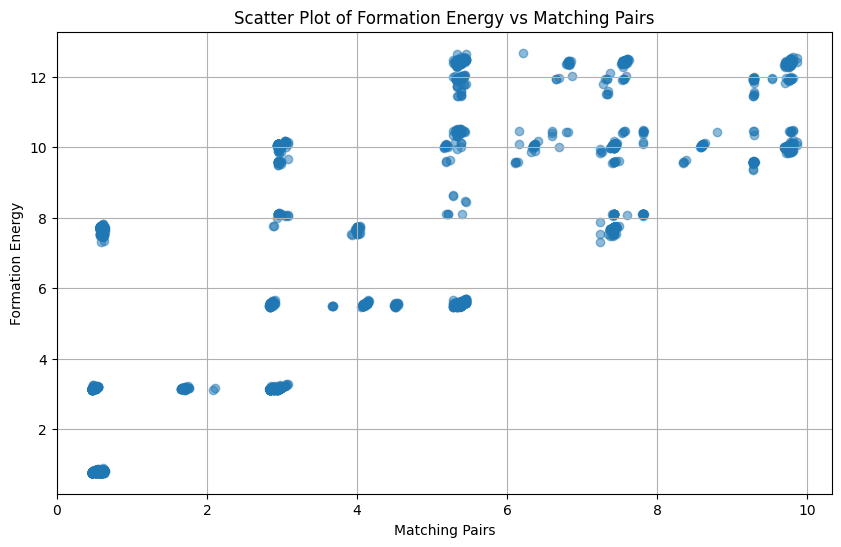

In [79]:
# Filter rows with non-NaN values in 'matching_pairs'
filtered_data_nonan = filtered_data[~filtered_data['matching_pairs'].isna()]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data_nonan['matching_pairs'], filtered_data_nonan['formation_energy'], alpha=0.5)
plt.title('Scatter Plot of Formation Energy vs Matching Pairs')
plt.xlabel('Matching Pairs')
plt.ylabel('Formation Energy')
plt.grid(True)
plt.show()

In [80]:
filtered_data[['formation_energy', 'matching_pairs']].corr()

,formation_energy,matching_pairs
formation_energy,1.000000,0.731852
matching_pairs,0.731852,1.000000
